In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = pd.read_csv('diabetes.csv')
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
print("dimension of diabetes data: {}".format(data.shape))

dimension of diabetes data: (768, 9)


In [10]:
data.shape

(768, 9)

In [11]:
data.isnull().values.any()

False

In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [14]:
data.groupby('Outcome').median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.0,107.0,70.0,21.0,39.0,30.05,0.336,27.0
1,4.0,140.0,74.0,27.0,0.0,34.25,0.449,36.0


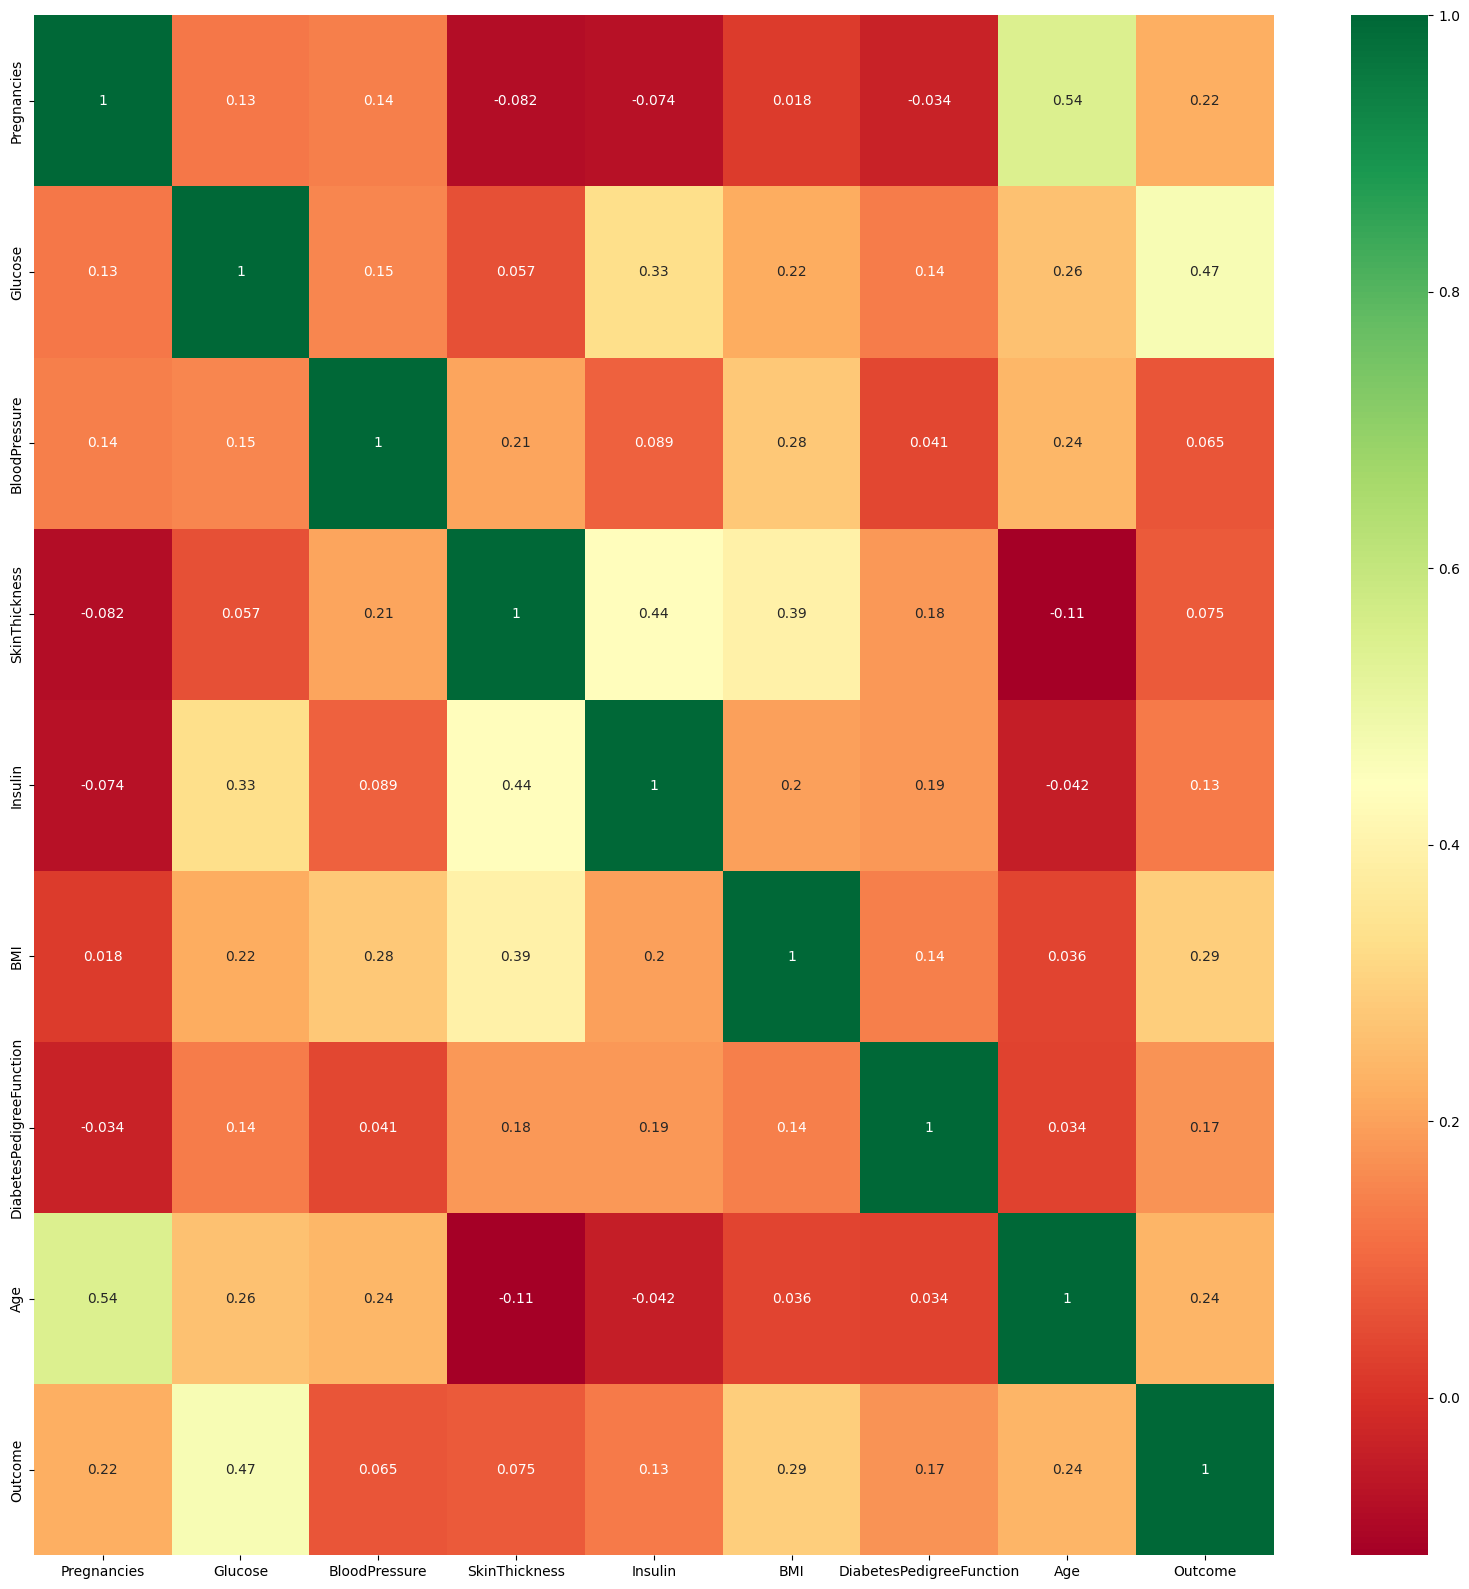

In [15]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<Axes: ylabel='count'>

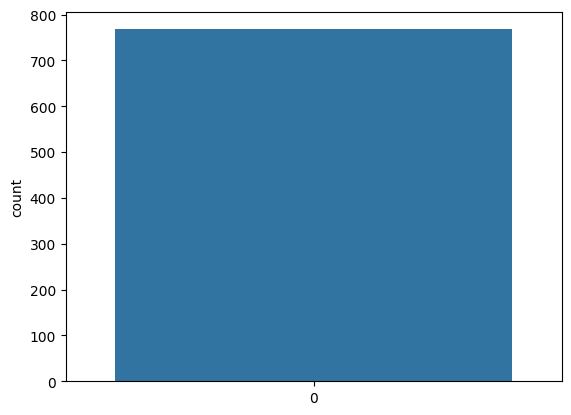

In [16]:
import seaborn as sns

sns.countplot(data['Outcome'],label="Count")

In [17]:
print(data.groupby('Outcome').size())

Outcome
0    500
1    268
dtype: int64


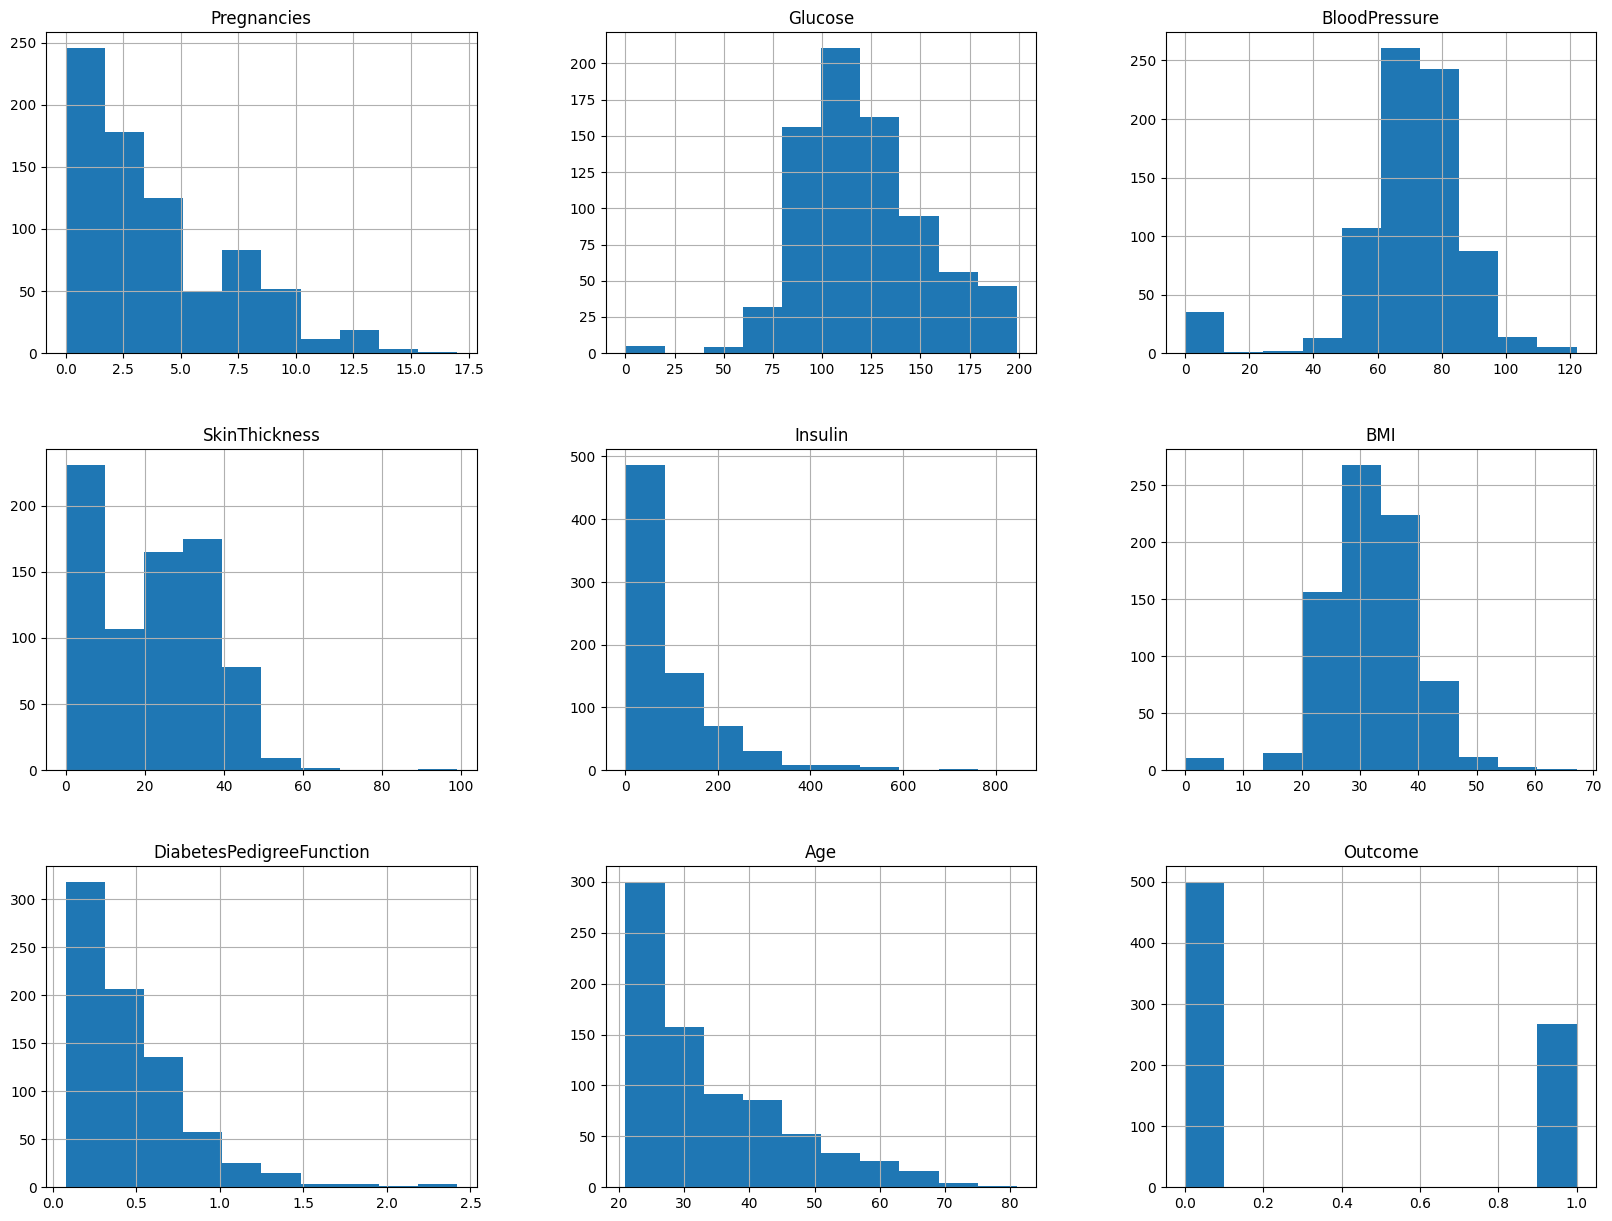

In [18]:
num_bins = 10

data.hist(bins=num_bins, figsize=(20,15))
plt.savefig("data_histogram_plots")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']
predicted_class = ['Outcome']
X = data[feature_columns].values
y = data[predicted_class].values


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=data['Outcome'], random_state=66)

In [20]:
from sklearn.neural_network import MLPClassifier as mlp

In [21]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), (100,1)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [22]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV(mlp(), parameter_space, n_jobs=-1, cv=5, scoring = 'accuracy')
clf.fit(X, y.ravel())

RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,),
                                                               (100, 1)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam']},
                   scoring='accuracy')

In [23]:
print("Accuracy on training set: {:.3f}".format(clf.score(X, y)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 0.669
Accuracy on test set: 0.667


In [24]:
from sklearn.neural_network import MLPClassifier
mlp_kosongan = MLPClassifier(max_iter=1000, alpha=1, random_state=66)
mlp_kosongan.fit(X, y.ravel())

print("Accuracy on training set: {:.3f}".format(mlp_kosongan.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp_kosongan.score(X_test, y_test)))

Accuracy on training set: 0.760
Accuracy on test set: 0.771


In [25]:
from sklearn.neural_network import MLPClassifier
mlp_param = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=99, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
mlp_param.fit(X, y.ravel())

print("Accuracy on training set: {:.3f}".format(mlp_param.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp_param.score(X_test, y_test)))

Accuracy on training set: 0.741
Accuracy on test set: 0.818


# New Section

In [45]:
y_pred = mlp_param.predict(X_test)
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import seaborn as sns
clf_cm = metrics.confusion_matrix(y_test, y_pred, [1,0])
sns.heatmap(clf_cm, annot=True, fmt='.2f',xticklabels = ["positive", "negative"] , yticklabels = ["positive", "negative"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('MLP')
plt.savefig('MLP')

TypeError: ignored

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, mlp.predict(X_test)))

TypeError: ignored

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.54      0.68       125
           1       0.51      0.90      0.65        67

    accuracy                           0.67       192
   macro avg       0.71      0.72      0.67       192
weighted avg       0.77      0.67      0.67       192



In [34]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=7)
modelCV = mlp
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X, y.ravel(), cv=kfold, scoring=scoring)
print("MLP : 5-fold cross validation average accuracy: %.3f" % (results.mean()))

ValueError: ignored

In [35]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=5, random_state=7)
modelCV = clf
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X, y.ravel(), cv=kfold, scoring=scoring)
print("CLF : 5-fold cross validation average accuracy: %.3f" % (results.mean()))

ValueError: ignored

In [36]:
scoring = 'precision'
results = model_selection.cross_val_score(modelCV, X_scaled, y.ravel(), cv=kfold, scoring=scoring)
print("5-fold cross validation precision precision: %.3f" % (results.mean()))

NameError: ignored

In [37]:
scoring = 'recall'
results = model_selection.cross_val_score(modelCV, X_scaled, y.ravel(), cv=kfold, scoring=scoring)
print("5-fold cross validation recall recall: %.3f" % (results.mean()))

NameError: ignored

In [38]:
scoring = 'f1'
results = model_selection.cross_val_score(modelCV, X_scaled, y.ravel(), cv=kfold, scoring=scoring)
print("5-fold cross validation f1-score f1-score: %.3f" % (results.mean()))

NameError: ignored

# New Section

In [39]:
X[34]

array([ 10.   , 122.   ,  78.   ,  31.   ,   0.   ,  27.6  ,   0.512,
        45.   ])

In [40]:
print(y[24])

[1]


In [41]:
mlp.predict([X[24]])

TypeError: ignored

In [42]:
mlp.predict([X[1]])

TypeError: ignored

In [43]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [44]:
plot_feature_importances_diabetes(mlp_param)

AttributeError: ignored

<Figure size 800x600 with 0 Axes>